# Projeto: Gryffindor, Treine um Quadricoptero A Voar

Projete um agente para pilotar um quadcopter e, em seguida, treine-o usando um algoritmo de aprendizado de reforço de sua escolha!

Tente aplicar as técnicas que você aprendeu, mas sinta-se à vontade para inventar ideias inovadoras e testá-las.

## Instruções

Dê uma olhada nos arquivos do diretório para entender melhor a estrutura do projeto.

- `task.py`: Defina sua tarefa (ambiente) neste arquivo.
- `agents /`: Pasta contendo agentes de aprendizado de reforço.
    - `policy_search.py`: Um agente de amostra foi fornecido aqui.
    - `agent.py`: Desenvolva seu agente aqui.
- `physics_sim.py`: Este arquivo contém o simulador para o quadcopter. ** NÃO MODIFICAR ESTE ARQUIVO **.

Para este projeto, você irá definir sua própria tarefa em `task.py`. Embora tenhamos fornecido uma tarefa de exemplo para você começar, é recomendável alterá-la. Posteriormente neste caderno, você aprenderá mais sobre como corrigir este arquivo.

Você também projetará um agente de aprendizado de reforço em `agent.py` para concluir sua tarefa escolhida.

Você está convidado a criar arquivos adicionais para ajudá-lo a organizar seu código. Por exemplo, você pode achar útil definir um arquivo `model.py` definindo qualquer arquitetura de rede neural necessária.

## Controlando o Quadcopter

Nós fornecemos um agente de amostra na célula de código abaixo para mostrar como usar o sim para controlar o quadcopter. Este agente é ainda mais simples que o agente de amostra que você examinará (em `agents / policy_search.py`) mais adiante neste caderno!

O agente controla o quadcopter definindo as revoluções por segundo em cada um dos seus quatro rotores. O agente fornecido na classe Basic_Agent abaixo sempre seleciona uma ação aleatória para cada um dos quatro rotores. Essas quatro velocidades são retornadas pelo método `act` como uma lista de quatro números de ponto flutuante.

Para este projeto, o agente que você implementará em `agents / agent.py` terá um método muito mais inteligente para selecionar ações!

In [32]:
import numpy as np
import random

np.random.seed(0)

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]


Execute a célula de código abaixo para que o agente selecione ações para controlar o quadcopter.

Sinta-se à vontade para alterar os valores fornecidos de `runtime`,` init_pose`, `init_velocities` e` init_angle_velocities` abaixo para alterar as condições iniciais do quadcopter.

A lista `labels` abaixo anota estatísticas que são salvas durante a execução da simulação. Todas essas informações são salvas em um arquivo de texto `data.txt` e armazenadas no dicionário` results`.

In [34]:
%load_ext autoreload
%autoreload 2

import csv
from task import Task
from policy_search import PolicySearch_Agent

# Modify the values below to give the quadcopter a different starting position.
runtime = 10000.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agente = PolicySearch_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    status = agente.reset_episode()
    total_reward = 0
    while True:
        velocidade_rotor = agente.act(status)
        proximo_estado, recompensa, done = task.step(velocidade_rotor)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(velocidade_rotor)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        total_reward += recompensa
        status = proximo_estado
        if done:
            print("Total episodios em recompensa : {}".format(total_reward))
            total_reward = 0
            break


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Setting default init pose
Total episodios em recompensa : 180.3923943306958


Execute a célula de código abaixo para visualizar como a posição do quadcopter evoluiu durante a simulação.

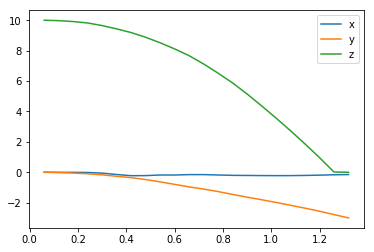

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

A próxima célula de código visualiza a velocidade do quadcopter.

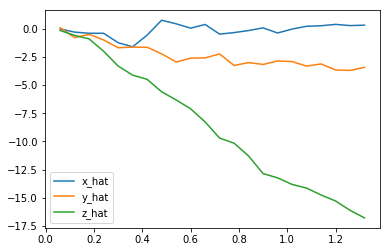

In [36]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Em seguida, você pode plotar os ângulos de Euler (a rotação do quadcopter sobre os $ x $ -, $ y $ - e $ z $ -axes),

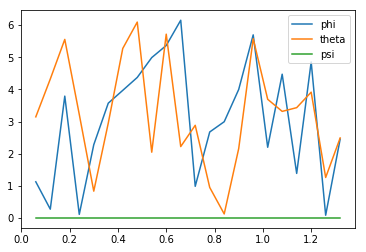

In [37]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

antes de traçar as velocidades (em radianos por segundo) correspondentes a cada um dos ângulos de Euler.

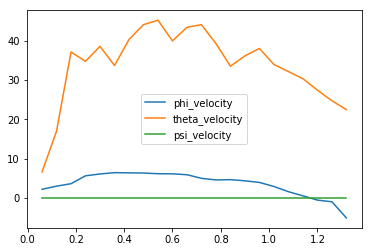

In [38]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finalmente, você pode usar a célula de código abaixo para imprimir a escolha de ações do agente.


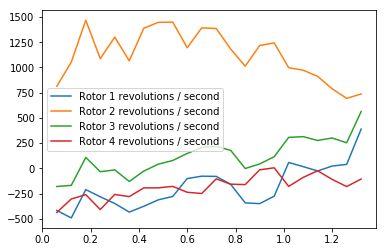

In [39]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

Ao especificar uma tarefa, você obterá o estado do ambiente no simulador. Execute a célula de código abaixo para imprimir os valores das seguintes variáveis ​​no final da simulação:
- `task.sim.pose` (a posição do quadcopter nas dimensões ($ x, y, z $) e os ângulos de Euler),
- `task.sim.v` (a velocidade do quadcopter nas dimensões ($ x, y, z $)), e
- `task.sim.angular_v` (radianos / segundo para cada um dos três ângulos de Euler).

In [40]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-0.14989747 -3.00107543  0.          2.45377409  2.48782023  0.        ]
[  0.33003079  -3.41848694 -16.79926183]
[ -5.13998447  22.47423183   0.        ]


Na tarefa de amostra em `task.py`, usamos a pose de 6 dimensões do quadcopter para construir o estado do ambiente em cada timestep. No entanto, ao alterar a tarefa para seus propósitos, você pode expandir o tamanho do vetor de estado incluindo as informações de velocidade. Você pode usar qualquer combinação de pose, velocidade e velocidade angular - sinta-se à vontade para mexer aqui e construir o estado para se adequar à sua tarefa.

## A tarefa

Uma tarefa de amostra foi fornecida para você em `task.py`. Abra este arquivo em uma nova janela agora.

O método `__init __ ()` é usado para inicializar diversas variáveis ​​necessárias para especificar a tarefa.
- O simulador é inicializado como uma instância da classe `PhysicsSim` (de` physics_sim.py`).
- Inspirado na metodologia do artigo original do DDPG, utilizamos repetições de ação. Para cada timestep do agente, nós aumentamos o tempo de ação da simulação `action_repeats`. Se você não estiver familiarizado com as ações repetidas, leia a seção ** Resultados ** no [documento DDPG] (https://arxiv.org/abs/1509.02971).
- Nós definimos o número de elementos no vetor de estado. Para a tarefa de amostra, trabalhamos apenas com as informações de pose de 6 dimensões. Para definir o tamanho do estado (`state_size`), devemos levar em conta as ações repetidas.
- O ambiente terá sempre um espaço de ação de 4 dimensões, com uma entrada para cada rotor (`action_size = 4`). Você pode definir os valores mínimo (`action_low`) e máximo (` action_high`) de cada entrada aqui.
- A tarefa de amostra neste arquivo fornecido é para o agente atingir uma posição de destino. Nós especificamos essa posição de destino como uma variável.

O método `reset ()` redefine o simulador. O agente deve chamar esse método toda vez que o episódio terminar. Você pode ver um exemplo disso na célula de código abaixo.

O método `step ()` é talvez o mais importante. Ele aceita a ação do agente `velocidade_rorot()`, que é usada para preparar o próximo estado a ser transmitido ao agente. Então, a recompensa é calculada a partir de `get_reward ()`. O episódio é considerado feito se o limite de tempo foi excedido, ou o quadcopter viajou para fora dos limites da simulação.

Na próxima seção, você aprenderá como testar o desempenho de um agente nessa tarefa.

## O agente

O agente de amostra fornecido em `agents / policy_search.py` usa uma política linear muito simplista para calcular diretamente o vetor de ação como um produto de ponto do vetor de estado e uma matriz de pesos. Então, ele perturba aleatoriamente os parâmetros adicionando algum ruído gaussiano, para produzir uma política diferente. Com base na recompensa média obtida em cada episódio (pontuação), ele acompanha o melhor conjunto de parâmetros encontrados até o momento, como a pontuação está mudando e, consequentemente, ajusta um fator de escala para aumentar ou diminuir o ruído.

Execute a célula de código abaixo para ver como o agente executa na tarefa de amostra.

In [46]:
import sys
import pandas as pd
from policy_search import PolicySearch_Agent
from task import Task

numero_de_episodios = 1000
posicao_do_alvo = np.array([0., 0., 500.])
task = Task(target_pos=posicao_do_alvo)
agente = PolicySearch_Agent(task) 

for i_episode in range(1, numero_de_episodios+1):
    status = agente.reset_episode() # start a new episode
    while True:
        acao = agente.act(status) 
        next_status, recompensa, done = task.step(acao)
        agente.step(recompensa, done)
        status = next_status
        if done:
            print("\rEpisode = {:4d}, Pontuação = {:7.3f} (BOMZINHO = {:7.3f} , TERRIVEL = {:7.3f})".format(
                i_episode, agente.score, agente.best_score, agente.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, Pontuação =   4.427 (BOMZINHO =   4.589 , TERRIVEL =   3.200)

Esse agente deve executar muito mal nessa tarefa. E é aí que você entra!

## Defina a tarefa, projete o agente e treine seu agente!

Emendar `task.py` para especificar uma tarefa de sua escolha. Se não tiver certeza do tipo de tarefa a ser especificada, você pode ensinar seu quadricóptero a decolar, pairar no seu lugar, aterrissar suavemente ou alcançar uma pose de alvo.

Depois de especificar sua tarefa, use o agente de amostra em `agents / policy_search.py` como um modelo para definir seu próprio agente em` agents / agent.py`. Você pode pegar emprestado o que precisar do agente de amostra, incluindo idéias sobre como modularizar seu código (usando métodos auxiliares como `act ()`, `learn ()`, `reset_episode ()`, etc.).

Observe que é altamente improvável ** que o primeiro agente e a tarefa que você especificar aprendam bem. Você provavelmente terá que ajustar vários hiperparâmetros e a função de recompensa para sua tarefa até chegar a um comportamento razoavelmente bom.

À medida que você desenvolve seu agente, é importante ficar de olho no desempenho dele. Use o código acima como inspiração para criar um mecanismo para registrar / salvar as recompensas totais obtidas em cada episódio para arquivo. Se as recompensas do episódio estão aumentando gradualmente, isso é uma indicação de que seu agente está aprendendo.

In [43]:
import psutil
#import GPUtil
import platform
print ("Plataform: ",platform.processor())
print ("CPU: ",psutil.cpu_count())
#print ("GPU: ",GPUtil.showUtilization())

Plataform:  x86_64
CPU:  1


# DDPG 

In [47]:
import sys
import pandas as pd
from drone import DDPG
from task import Task
import csv

numero_de_episodios = 1000  #num_episodios
posicao_do_alvo = np.array([0., 0., 100.])
#task = Task(posicao_do_alvo=posicao_do_alvo) # target_pos=target_pos
task = Task(target_pos=posicao_do_alvo)
agente = DDPG(task) 
terrivel_score = 1000000
melhor_score = -1000000.
reward_log = "log.txt"

reward_labels = ['episode', 'reward']
reward_results = {x : [] for x in reward_labels}

In [48]:
for i_episode in range(1, numero_de_episodios+1):
    status = agente.reset_episode() # start a new episode
    score = 0
    while True:
        acao = agente.act(status) 
        proximo_estado, recompensa, done = task.step(acao)
        agente.step(acao, recompensa, proximo_estado, done)
        status = proximo_estado
        score += recompensa
        if done:
            print("\rEpisode = {:4d}, Pontuação = {:7.3f} (BOMZINHO = {:7.3f} , TERRIVEL = {:7.3f})".format(
               i_episode, score, max(melhor_score , score), min(terrivel_score , score)), end="")
            break
    reward_results['episode'].append(i_episode)
    reward_results['reward'].append(score)
    sys.stdout.flush()


Episode = 1000, Pontuação = 202.845 (BOMZINHO = 202.845 , TERRIVEL = 202.845)

## Traçar as recompensas

Quando estiver satisfeito com o seu desempenho, trace as recompensas do episódio, seja a partir de uma única corrida, ou calculando a média de várias execuções

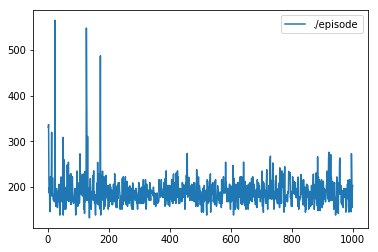

In [49]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(reward_results['episode'], reward_results['reward'], label='./episode')
plt.legend()
_ = plt.ylim()

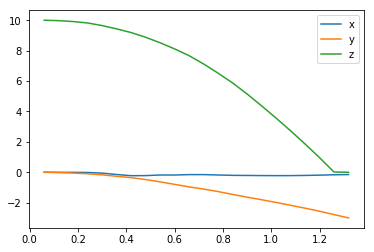

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

In [51]:
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 15.85891243   0.23300716   0.           5.45621321   6.24329345   0.        ]
[ 20.56218023   0.40446412 -13.67546039]
[-28.75124432  -8.51797259   0.        ]


## Reflexões

**Questão 1**: Descreva a tarefa que você especificou em `task.py`. Como você projetou a função de recompensa?

**Responda**:

R1: Selecionei uma tarefa de decolagem mais fácil para treinar o agente. Por recompensa, eu estava inicialmente usando a diferença entre sim.pose e target.pose que, levava a muito pouco/quase nenhum aprendizado.

R2: Mais tarde mudei-me para uma função não linear 'tanh' que limitava a recompensa a .Para que isso funcione, algumas ajustes foram feitas para tornar os valores relativamente significativos para a função tanh.

#####  np.tanh(1 - 0.003*(abs(self.sim.pose[:3] - self.target_pos))).sum()
#### PS: apanhei mt pra chegar nisso aqui, li mt projeto e catei até um professor de onde estudo esse projeto foi foda.

Modelo que usei, DDPG, para a tarefa com a mesma arquitetura e hyperparams inicialmente. Um dos algoritmos de aprendizado por reforço adequados para espaço com ação contínua. Embora os primeiros treinos deram mt errado pq tava terrivel. No fim descobri que alguns ajustes de hiperparâmetros, e o principal culpado na real era do arco da rede que usava nas classes do ator e do critico.

+ Deep Deterministic Policy Gradients (DDPG) 

**Questão 2**: Discuta seu agente brevemente, usando as seguintes perguntas como um guia:

- Qual (is) algoritmo (s) de aprendizado você tentou? O que funcionou melhor para você?
- Qual foi a sua escolha final de hiperparâmetros (como $ \ alpha $, $ \ gamma $, $ \ epsilon $, etc.)?
- Qual arquitetura de rede neural você usou (se houver)? Especifique camadas, tamanhos, funções de ativação, etc.

**Responda**:

+ hiperparâmetros: { Tamanho do minibatch de men para experiencia = 64;  Tau: 0,001 ; Taxa de learn para o ator: 0,0001 ;  Taxa de learn para o crítico: 0,001 ; Gama = 0,99 ; Cap. mem de repeat exp: 1000000 }

+ Sim, o agente/drone final usa o arco da Rede Neural.
    + Ator:
        + Densa (unidades = 400) + BatchNorm + L2 Regularização + ReLu Ativação
        + Densa (unidades = 300) + BatchNorm + L2 Regularização + ReLu Ativação
        + Densidade (Inicialização de Peso Aleatória e Uniforme) + Ativação Sigmóide
    
    + Critico:
        + O mesmo que ator para o caminho do estado
        + Caminho de ação: Densa (unidades = 300) + Regularização L2 + Ativação ReLu
        + Combinando: Adicionar com Ativação ReLu
        
  O arco de camadas com grandes unidades na real ajudou o drone a aprender de forma mais rápida,eficaz e eu achei um pouco fluido. Além disso, o tempo de treinamento diminuiu significativamente.


**Pergunta 3**: Usando o gráfico de recompensas do episódio, discuta como o agente aprendeu com o tempo.

- Foi uma tarefa fácil de aprender ou difícil?
- Houve uma curva de aprendizado gradual ou um momento de aha?
- Quão bom foi o desempenho final do agente? (por exemplo, recompensas médias nos últimos 10 episódios)

**Responda**:
Eu achei foda pra caraleo, ja desenvolvi robos e fiz alguns projetos usando machine learning e visão computacional com CNN, soq esse trabalho não foi facil, tive mt ajuda de professor, coleguinhas de mestrado e um professor de fisica.
Mas confesso que achei mt legal a idea de trabalhar gradualmente com um drone usando experienca e recompensa para apredendizado. 

Então..... , na real foi ambos. no começo rodou terrivel depois de ajustes de hyperparametros e suporte de um professor que, por mais frustante que parece-se poderia melhorar se eu olha-se melhor pro codigo e pensa-se que "erros bobos" poderiam resolver bem, enfim o aprendizado do agente por mais tempo de episodios deu um drone/agente bom somando isso com a ideia de uma rede que melhorace.

**Pergunta 4**: Resuma brevemente sua experiência de trabalho neste projeto. Você pode usar os seguintes prompts para ideias.

Qual foi a parte mais difícil do projeto? (por exemplo, começar, plotar, especificar a tarefa, etc.)
- Você achou alguma coisa interessante em como o quadricóptero ou seu agente se comportou?

**Responda**:
Mds, começar acho que foi dificil pra caramba, li outros projetos achei meio mt confuso, comecei a escrever, nada de aprender direito sempre caos, bati cabeça com paramentros, li sobre fisica de drones achei complexo, pq sempre trabalhei com robos "normais" tipo arduino, raspberry, ja brinquei com kinect e tenho um Lidar bem ruim, mas acho q se eu passar nesse projeto talvez tire ele do armario kkkkk, achei tambem os modelos de Policy Gradient foram hard pq visualizar foi hard no começo, no fim ja vi tava quase entendendo sapoha.(PS: to com raiva desse projeto já, pq to entendendo algumas coisas bem outras ainda não dps vou voltar pra aula 1 do programa pq ainda me sinto meio estranho, acho que deep learning da dor de barriga, esse semestre to pagando calculo 2 e to lendo sobre umas paradas cabulosas)
Massssssss uma coisa que achei mt legal foi o rolé de recompensa da função. Fiquei bastante impressionado com a forma da inferência de uma forma simples pode variar bem em relação a metricas de init aleatorias.